In [1]:
#Importing All the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#Importing warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('Heart_Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
#Replacing the question mark with NaN
df = df.replace('?',np.nan ) 
df.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
5,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0
6,65,1,4,150,236,1,1,105,1,0,NaN,NaN,NaN,3


In [4]:
#Checking for missing values
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
target        0
dtype: int64

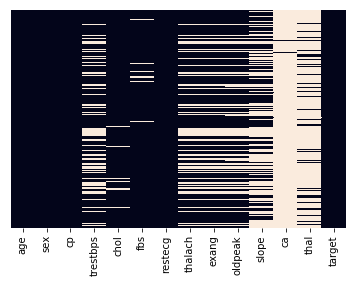

In [5]:
#Checking it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
#Checking the data type
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
target       int64
dtype: object

Before filling the missing values we have to change its data type.

In [7]:
#Changing the data type of columns to impute the missing values

df['trestbps']=pd.to_numeric(df['trestbps'],errors='coerce')
df['chol']=pd.to_numeric(df['chol'],errors='coerce')
df['fbs']=pd.to_numeric(df['fbs'],errors='coerce')
df['thalach']=pd.to_numeric(df['thalach'],errors='coerce')
df['exang']=pd.to_numeric(df['exang'],errors='coerce')
df['oldpeak']=pd.to_numeric(df['oldpeak'],errors='coerce')
df['slope']=pd.to_numeric(df['slope'],errors='coerce')
df['thal']=pd.to_numeric(df['thal'],errors='coerce')
df['ca']=pd.to_numeric(df['ca'],errors='coerce')

In [8]:
#Now Checking the data type of columns

print(df['trestbps'].dtypes)
print(df['chol'].dtypes)
print(df['fbs'].dtypes)
print(df['thalach'].dtypes)
print(df['exang'].dtypes)
print(df['oldpeak'].dtypes)
print(df['slope'].dtypes)
print(df['thal'].dtypes)
print(df['ca'].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64


Now the data type of columns has been changed.

In [9]:
#Checking mean and mode of the columns

print(df.trestbps.mean())
print(df.chol.mean())
print(df.fbs.mode())
print(df.thalach.mean())
print(df.exang.mode())
print(df.oldpeak.mean())
print(df.slope.mode())
print(df.thal.mean())
print(df.ca.mean())

133.76388888888889
178.7461139896373
0    0.0
dtype: float64
122.79591836734694
0    1.0
dtype: float64
1.3208333333333333
0    2.0
dtype: float64
6.294117647058823
0.0


Now Fill the Missing value with their mean.

In [10]:
#Now fill the missing values with their

df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['fbs'].fillna(0,inplace=True)
df['thalach'].fillna(df['thalach'].mean(),inplace=True)
df['exang'].fillna(1,inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)
df['slope'].fillna(2,inplace=True)
df['thal'].fillna(df['thal'].mean(),inplace=True)
df['ca'].fillna(df['ca'].mean(),inplace=True)

In [11]:
#Again checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.isnull().values.any()

False

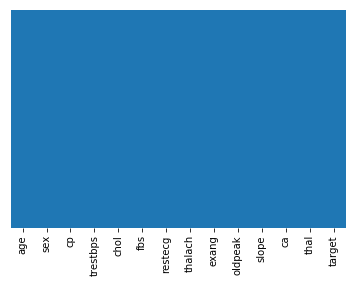

In [13]:
#Now again check it via visualization
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

### Now our data is clean from here we put it in dataframe and do our EDA process.

In [14]:
#Putting the data into Pandas DataFrame

df_heart=pd.DataFrame(df)
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,0.0,6.294118,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,0.0,6.294118,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,0.0,6.294118,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,0.0,6.294118,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0.0,6.294118,0


In [15]:
#Checking the columns
df_heart.shape

(200, 14)

In this dataset there are 200 rows and 14 columns are present.

In [16]:
#Checking the various columns.
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
#Checking the data types of the columns
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [18]:
#Checking the information of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
age         200 non-null int64
sex         200 non-null int64
cp          200 non-null int64
trestbps    200 non-null float64
chol        200 non-null float64
fbs         200 non-null float64
restecg     200 non-null int64
thalach     200 non-null float64
exang       200 non-null float64
oldpeak     200 non-null float64
slope       200 non-null float64
ca          200 non-null float64
thal        200 non-null float64
target      200 non-null int64
dtypes: float64(9), int64(5)
memory usage: 22.0 KB


Observation:

1-There are no missing value present in our dataset.

2-In this dataset there are only two types of data type present i.e. integer and float.

3-Dataset consist of 200 rows and 14 columns.

# Summary Statistics

In [19]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,2.065000,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.471046,0.0,0.526001,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.0,6.294118,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,2.000000,0.0,6.294118,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,6.294118,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


Observation:

1-Here minimum age is 35 years and maximun age is 77.

2-Sex is only two values female(0) and male(1).

3-trestbps - resting blood pressure has minimum value zero and maximum value is 190.

4-Highest Cholestrol level is 458.

5-Maximum heart rate is 180.

6-ca - number of major vessels (0-3) colored by flourosopy is zero thats why we dropped it.


In [20]:
#Dropping ca
df_heart=df_heart.drop(columns=['ca'],axis=1)

## Exploring Data Variables

In [21]:
df_heart.target.nunique()

5

Observation:

    We can see that there are 5 unique values in the target variable.

In [22]:
df_heart.target.unique()

array([2, 0, 1, 3, 4], dtype=int64)

Observation:
    
    1-The unique values are 0,1,2,3,4, (0 for absence of hear disease and 1,2,3,4 stands for presence of heart disease 
      according to their level.)
    
    2-Here 1,2,3,4 specify the Level of disease i.e. miner or malignant.

In [23]:
#Frequency distribution of target variable

df_heart.target.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: target, dtype: int64

Observation:
    
    51 people have not heart disease and rest of have suffering from heart disease.
    
Note: 
     
     In data visualization we change our target column in 0 and 1.

# To check the Correlation

In [24]:
heart=df_heart.corr()
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.135728,0.002400,-0.149949,0.129027,0.157087,0.107135,0.084672,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.059400,0.060621,-0.001592,0.029402,0.097267,0.086709,-0.078866,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.044416,0.034790,-0.123597,0.089904,0.040155,0.059460,0.055794,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.192337,0.092042,-0.013046,0.205900,0.115432,0.083459,0.082839,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.173396,0.024257,-0.041209,0.117050,0.002160,0.043363,-0.071654,0.076444
fbs,0.135728,-0.059400,-0.044416,0.192337,0.173396,1.000000,0.170616,0.037972,-0.176144,-0.105363,-0.009435,0.026034,0.048940
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.170616,1.000000,0.012348,-0.063203,-0.106991,-0.039881,0.052624,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.037972,0.012348,1.000000,-0.070142,0.172048,-0.107241,-0.203311,-0.079077
exang,0.129027,0.029402,0.089904,0.205900,0.117050,-0.176144,-0.063203,-0.070142,1.000000,0.289320,0.106259,0.120129,0.206541
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.105363,-0.106991,0.172048,0.289320,1.000000,0.292698,0.090996,0.378209


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).


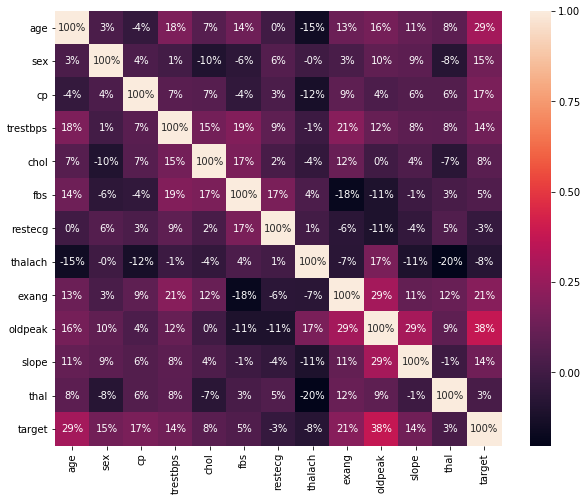

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(heart,annot=True,fmt='.0%')
plt.show()

Text(0.5,1,'Correlation with target Variable')

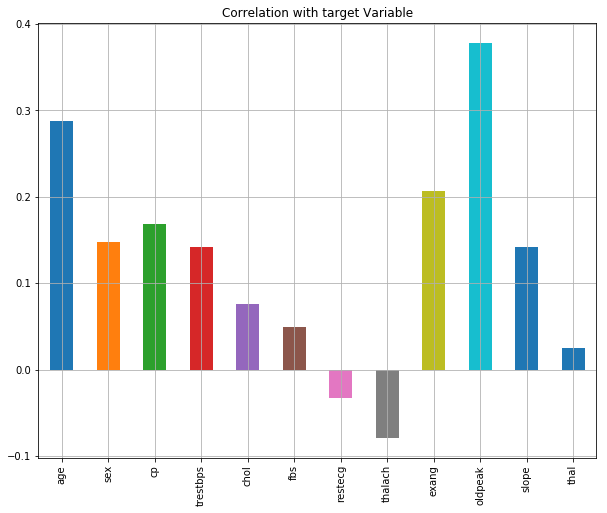

In [26]:
plt.figure(figsize=(10,8))
df_heart.drop('target', axis=1).corrwith(df_heart.target).plot(kind='bar',grid=True)
plt.title("Correlation with target Variable")

Observation:
    
    1-thalach is highly negatively correlated with target.
    
    2-restecg is also negatively correlated with target after tahlach.
    
    3-oldpeak is highly positive correlated with target.
    
    4-Age is also highly positive correlated with target.

# Data Visualization

Our feature variable of interest is target.

It refers to the presence of heart disease in the patient.

It is integer valued as it contains five integers. So we change it in 0 and 1.

0 stands for No heart Disease 

1 stands for heart disease.

In [27]:
#Changing our target variable in 0 and 1.
df_heart['target']=df_heart.target.map({0:0,1:1,2:1,3:1,4:1})

In [28]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,6.294118,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,6.294118,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,6.294118,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,6.294118,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,6.294118,0


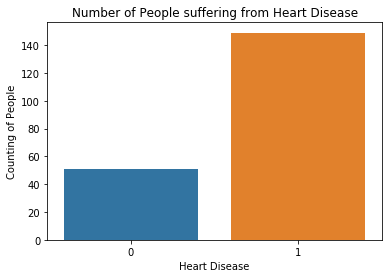

1    149
0     51
Name: target, dtype: int64


In [29]:
#Checking number of people suffering from heart disease.
plt.subplots(figsize=(6,4))
sns.countplot(x="target", data=df_heart)
plt.title("Number of People suffering from Heart Disease")
plt.xlabel('Heart Disease')
plt.ylabel('Counting of People')
plt.show()

print(df_heart.target.value_counts())

Observation:
    
    1-51 people do not suffer from heart disease.
    
    2-149 people have heart disease.

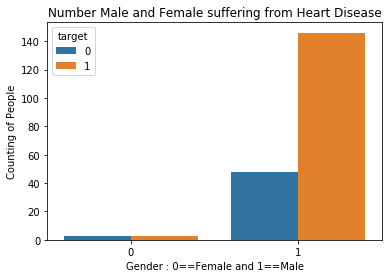

sex  target
0    0           3
     1           3
1    1         146
     0          48
Name: target, dtype: int64


In [30]:
#Checking number of people suffering from heart disease according to Gender.
plt.subplots(figsize=(6,4))
sns.countplot(x="sex",hue='target',data=df_heart)
plt.title("Number Male and Female suffering from Heart Disease")
plt.xlabel('Gender : 0==Female and 1==Male')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('sex')['target'].value_counts())


Observation:
    
    1-146 male suffering from heart disease.
    
    2-only three female suffering from heart disease.
    
Findings:
    
    Heart problem is more in male as compare to female.

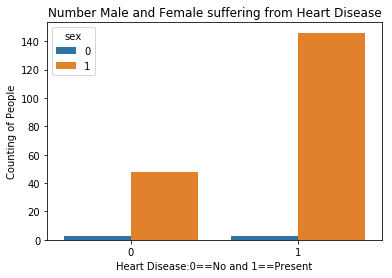

sex  target
0    0           3
     1           3
1    1         146
     0          48
Name: target, dtype: int64


In [31]:
plt.subplots(figsize=(6,4))
sns.countplot(x="target",hue='sex',data=df_heart)
plt.title("Number Male and Female suffering from Heart Disease")
plt.xlabel('Heart Disease:0==No and 1==Present')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('sex')['target'].value_counts())


Observation:

    1-146 male suffering from heart disease.

    2-only three female suffering from heart disease.

Findings:

    Heart problem is more in male as compare to female.

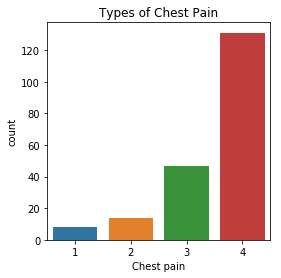

4    131
3     47
2     14
1      8
Name: cp, dtype: int64


In [32]:
#Checking the how many people suffering from different-2 type of chest pain
plt.figure(figsize=(4,4))
sns.countplot(x="cp", data=df_heart)
plt.title("Types of Chest Pain")
plt.xlabel('Chest pain')
plt.show()

print(df_heart.cp.value_counts())

Observation:
    
    cp  - chest pain type
        -- Value 1: typical angina=== 8 people
        -- Value 2: atypical angina== 14 people
        -- Value 3: non-anginal pain== 47 people
        -- Value 4: asymptomatic===  131 people

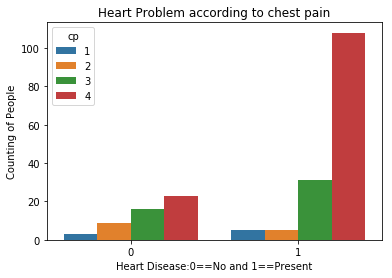

cp  target
1   1           5
    0           3
2   0           9
    1           5
3   1          31
    0          16
4   1         108
    0          23
Name: target, dtype: int64


In [33]:
#Checking the heart problem according to chest pain.
plt.subplots(figsize=(6,4))
sns.countplot(x="target",hue='cp',data=df_heart)
plt.title("Heart Problem according to chest pain")
plt.xlabel('Heart Disease:0==No and 1==Present')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('cp')['target'].value_counts())


Observation:
    
    1-Value 4: asymptomatic---This type of pain in chest will cause more Heart Problem.

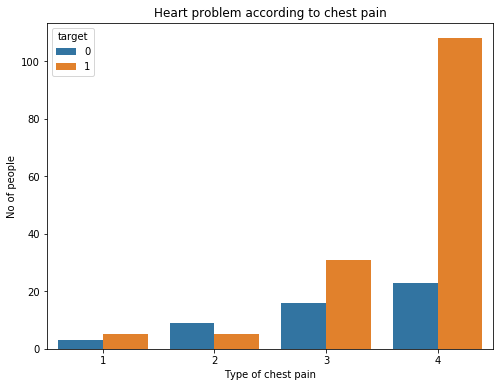

In [34]:
#Checking how many number of people suffering from heart disease according to chest pain.
plt.figure(figsize=(8, 6))
sns.countplot(x="cp", hue="target", data=df_heart)
plt.title('Heart problem according to chest pain')
plt.xlabel('Type of chest pain')
plt.ylabel('No of people')
plt.show()

Observation:
    
    
cp  - chest pain type

    -- Value 1: typical angina
    -- Value 2: atypical angina
    -- Value 3: non-anginal pain
    -- Value 4: asymptomatic
        
        Value 4-asymptomatic---This type of pain in chest will cause more Heart Problem.

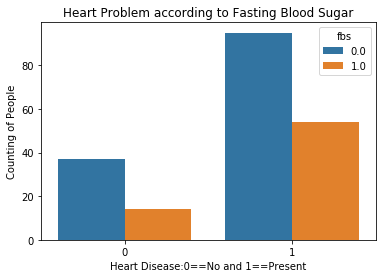

fbs  target
0.0  1         95
     0         37
1.0  1         54
     0         14
Name: target, dtype: int64


In [35]:
#Checking heart problem according to fasting blood sugar.
plt.subplots(figsize=(6,4))
sns.countplot(x="target",hue='fbs',data=df_heart)
plt.title("Heart Problem according to Fasting Blood Sugar")
plt.xlabel('Heart Disease:0==No and 1==Present')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('fbs')['target'].value_counts())


Observation:
    
    1-fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    
    2-If fbs is less than 120 mg/dl than there is a high chance of heart problem.


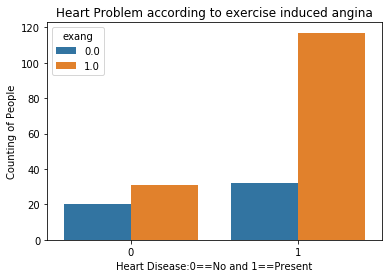

exang  target
0.0    1          32
       0          20
1.0    1         117
       0          31
Name: target, dtype: int64


In [36]:
#Checking heart problem due to exercise induced angina.
plt.subplots(figsize=(6,4))
sns.countplot(x="target",hue='exang',data=df_heart)
plt.title("Heart Problem according to exercise induced angina")
plt.xlabel('Heart Disease:0==No and 1==Present')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('exang')['target'].value_counts())


Observation:
    
    1-exang - exercise induced angina (1 = yes; 0 = no)
    
    2-If exercise induceses angina than there is a high chance of heart problem.


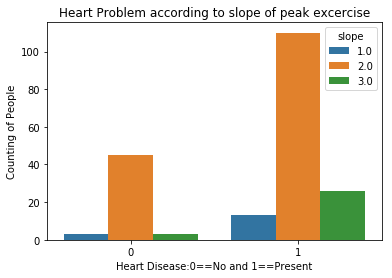

slope  target
1.0    1          13
       0           3
2.0    1         110
       0          45
3.0    1          26
       0           3
Name: target, dtype: int64


In [37]:
#Checking the heart problem according to slope.
plt.subplots(figsize=(6,4))
sns.countplot(x="target",hue='slope',data=df_heart)
plt.title("Heart Problem according to slope of peak excercise")
plt.xlabel('Heart Disease:0==No and 1==Present')
plt.ylabel('Counting of People')
plt.show()


print(df_heart.groupby('slope')['target'].value_counts())


Observation:
    
    slope - the slope of the peak exercise ST segment
            -- Value 1: upsloping
            -- Value 2: flat
            -- Value 3: downsloping 
                
    If the slope of the peak exercise is flat than there is a high chance of heart disease.


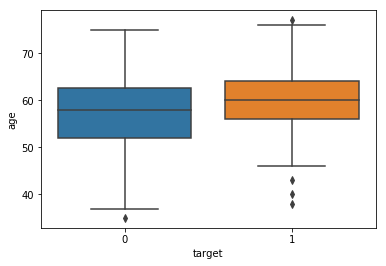

In [38]:
#Analysis of Target and age.

plt.figure(figsize=(6,4))
sns.boxplot(x='target',y='age',data=df_heart)

Observation:
    
    The mean age of the people who have heart disease is greater than the mean age of the people who do not have heart
    disease.

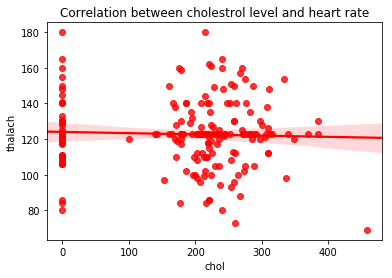

In [39]:
#Analysis of maximum heart rate (thalach) and Cholestrol

sns.regplot(x='chol',y='thalach',data=df_heart,color='r')
plt.title('Correlation between cholestrol level and heart rate')
plt.show()

Observation:
    
     The above plot shows that there is no correlation between chol and thalach variable.

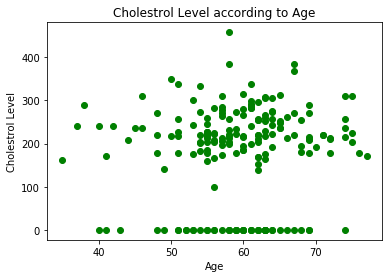

In [40]:
#Scatter plot between age and cholestrol level.
plt.scatter(x='age',y='chol',data=df_heart,color='g')
plt.xlabel('Age')
plt.title("Cholestrol Level according to Age")
plt.ylabel('Cholestrol Level')
plt.show()

Observation:
    
    1-There is a minor correlation between age and cholestrol level.
    
    2-Cholestrol level is 170 to 300 for age group of 52 to 68.

<Figure size 576x288 with 0 Axes>

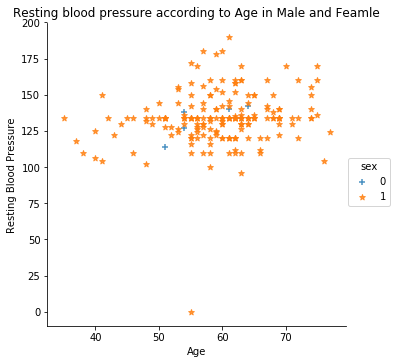

In [41]:
#Scatter plot between age and resting blood sugar a/c to sex.
plt.figure(figsize=(8,4))
sns.lmplot(x='age',y='trestbps',hue='sex',fit_reg=False,markers=['+','*'],data=df_heart)
plt.xlabel('Age')
plt.title("Resting blood pressure according to Age in Male and Feamle")
plt.ylabel("Resting Blood Pressure")
plt.show()

<Figure size 576x288 with 0 Axes>

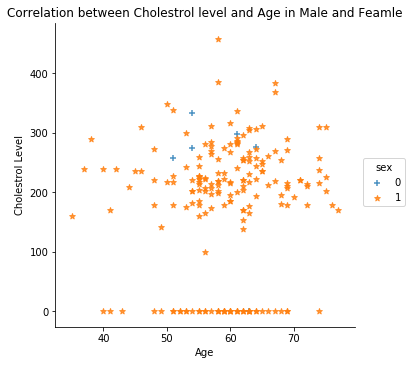

In [42]:
#Scatter plot between age and cholestrol a/c to Sex.
plt.figure(figsize=(8,4))
sns.lmplot(x='age',y='chol',hue='sex',fit_reg=False,markers=['+','*'],data=df_heart)
plt.xlabel('Age')
plt.title("Correlation between Cholestrol level and Age in Male and Feamle")
plt.ylabel("Cholestrol Level")
plt.show()

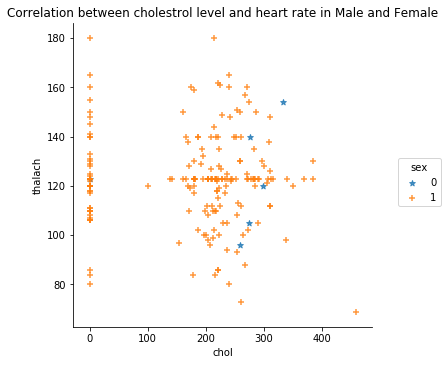

In [43]:
#Analysis of maximum heart rate (thalach) and Cholestrol in male and female

sns.lmplot(x='chol',y='thalach',data=df_heart,hue='sex',markers=['*','+'],fit_reg=False)
plt.title('Correlation between cholestrol level and heart rate in Male and Female')
plt.show()

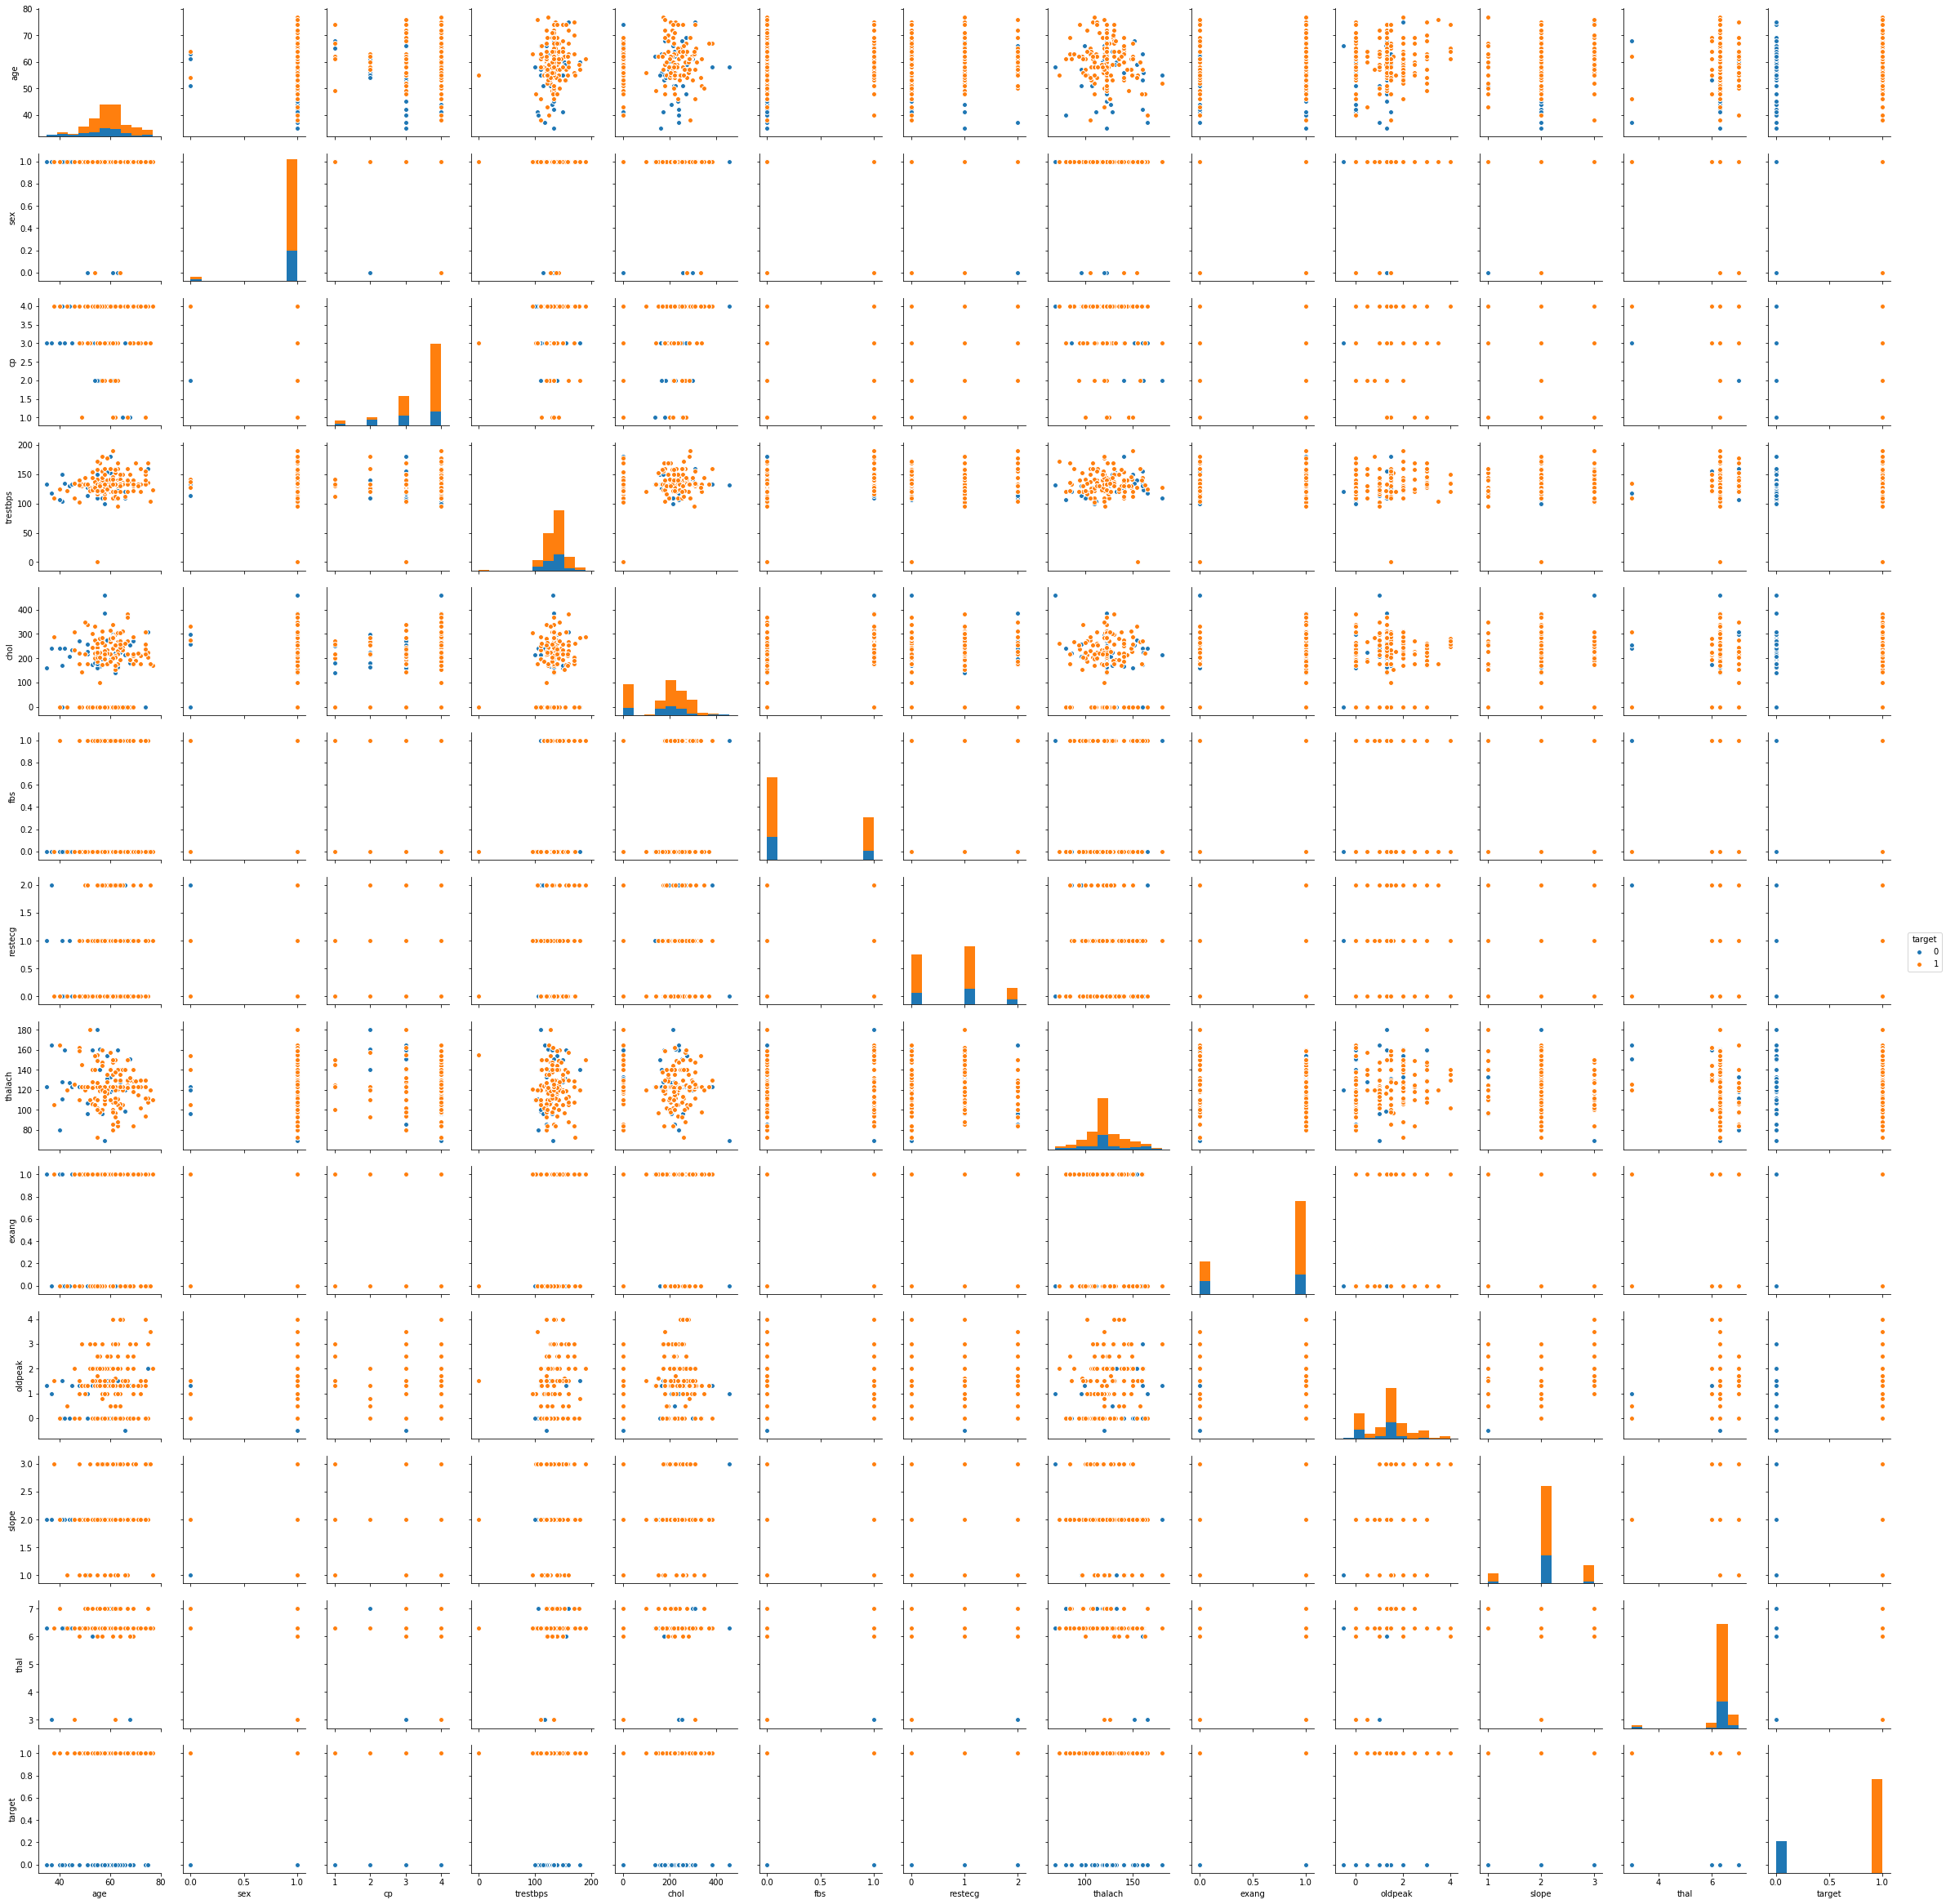

In [44]:
#Pairplot a/c to target.
sns.pairplot(df_heart,hue='target')
plt.show()

## To check the distribution of Skewness

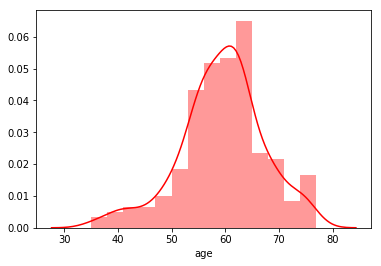

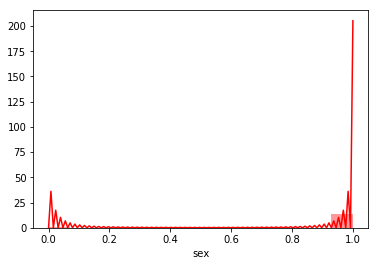

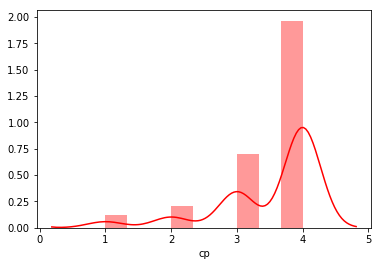

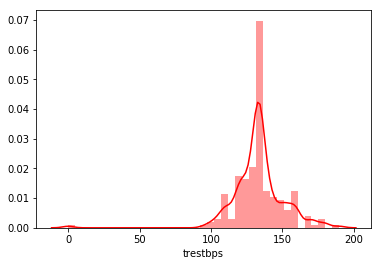

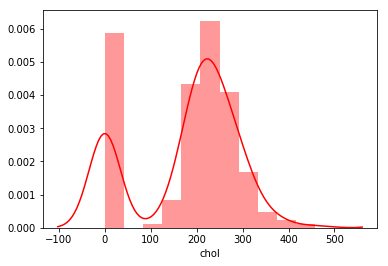

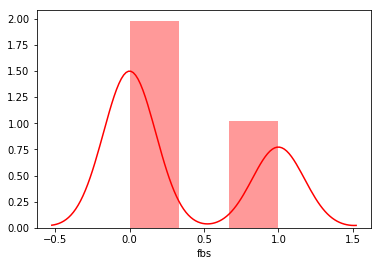

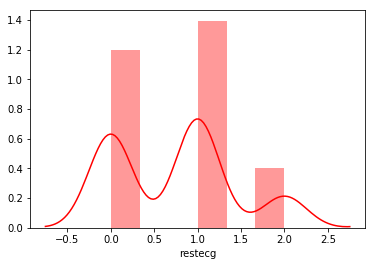

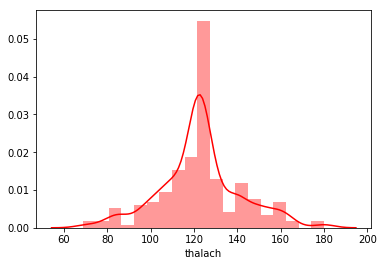

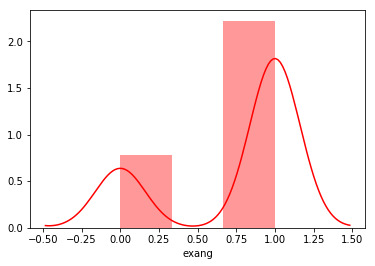

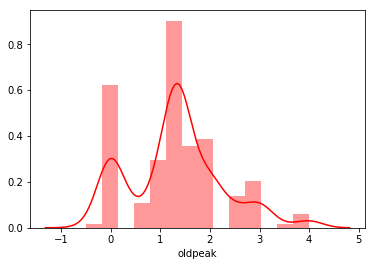

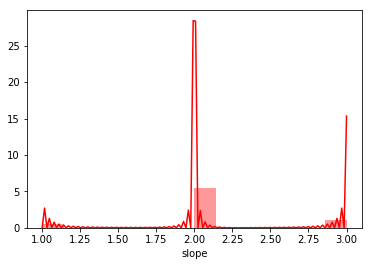

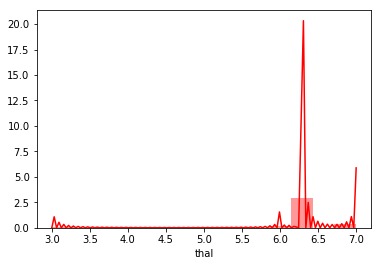

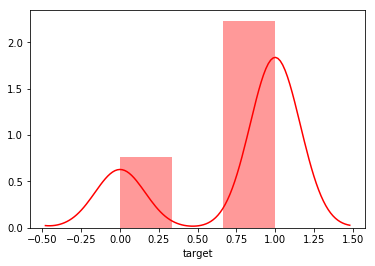

In [45]:
for col in df_heart.columns:
    sns.distplot(df_heart[col],color='r')
    plt.show()

In [46]:
#Checking for Skewness

df_heart.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exang      -1.102593
oldpeak     0.423414
slope       0.210521
thal       -4.724092
target     -1.132724
dtype: float64

Note: If we are going to remove the skewness than its value increases.
     
     So in model training we scale it.

# Plotting Outliers

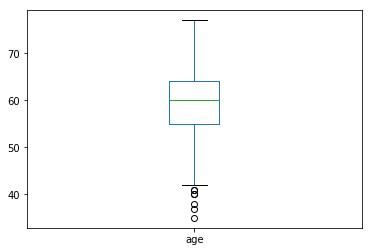

In [47]:
df_heart['age'].plot.box()

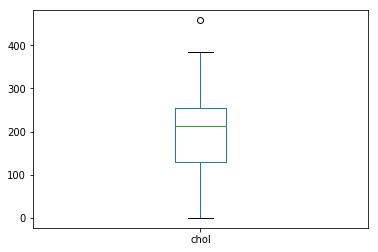

In [48]:
df_heart['chol'].plot.box()

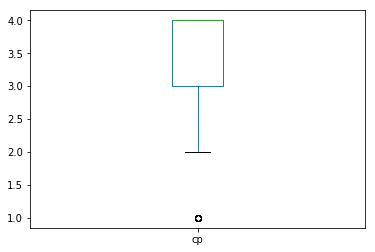

In [49]:
df_heart['cp'].plot.box()

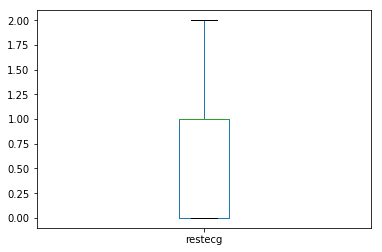

In [50]:
df_heart['restecg'].plot.box()

Observation:
    
    There are some outliers are present in our data which we have to remove it.

# Removing Outliers

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df_heart))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.38337018e-01, 1.69278480e-15, 5.85048613e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.38337018e-01, 1.69278480e-15, 1.70925967e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        1.98992480e+00, 1.69278480e-15, 5.85048613e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.38337018e-01, 5.60560662e-01, 5.85048613e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.38337018e-01, 1.69278480e-15, 1.70925967e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        1.38337018e-01, 1.69278480e-15, 5.85048613e-01]])

In [52]:
threshold=3
print(np.where(z>3))

(array([ 12,  24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128,
       131, 133, 137, 171, 176, 189, 190, 194, 195, 196], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
        3, 11,  1, 11,  1,  2], dtype=int64))


In [53]:
new_heart=df_heart[(z<3).all(axis=1)]

In [54]:
#Checking the shape
print(df_heart.shape,'\t\t',new_heart.shape)

(200, 13) 		 (177, 13)


In [55]:
df_heart=new_heart
df_heart.shape

(177, 13)

23 rows are removed which will treated as outliers. 
    
Now EDA process is completed.

# Model Training

In [56]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,6.294118,1
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,6.294118,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,6.294118,1
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,6.294118,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,6.294118,0


In [57]:
#Splitting the data into input and output variable.
x=df_heart.drop(columns=['target'],axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,6.294118
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.0,6.294118
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,6.294118
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,6.294118
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,6.294118


In [58]:
y=df_heart['target']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int64

In [59]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(177, 12) 		 (177,)


In [60]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [61]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=59,stratify=y)

In [62]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(141, 12) 		 (36, 12)


In [63]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(141,) 	 (36,)


In [64]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [65]:
# All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
       AdaBoostClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.8888888888888888
[[ 5  3]
 [ 1 27]]
             precision    recall  f1-score   support

          0       0.83      0.62      0.71         8
          1       0.90      0.96      0.93        28

avg / total       0.89      0.89      0.88        36

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.8055555555555556
[[ 6  2]
 [ 5 23]]
             precision    recall  f1-score   support

          0       0.55      0.75      0.63         8
          1       0.92      0.82      0.87        28

avg / total       0.84      0.81      0.82        36

*********************************************************************

In [66]:
#Cross Validate the models

from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),
        AdaBoostClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.84615385 0.83333333 0.66666667 0.83333333 0.83333333 0.75
 0.75       0.66666667 0.83333333 0.75       0.83333333 0.81818182
 0.72727273 0.81818182 0.72727273]
Mean Score: 0.7791375291375291
Standard deviation: 0.06080148994341064
************************************************************************************************


Model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Score: [0.84615385 0.91666667 0.75       0.75       0.75       0.75
 0.75       0.75       0.83333333 0.75       0.75       0.81818182
 0.81818182 0.8181818

### RandomForestClassifier, KNeighborsClassifier and LogisticRegression is giving the best score

Now we cross check between Random Forest Classifier, KNeighbors Classifier and Logistic Regression that overall which one gives best result.

#### RandomForestClassifier

In [68]:
#Using GridSearchCV to find out the best parameter in RandomForestClassifier

RFC=RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':range(100,200,300),'criterion':('gini','entropy'),'random_state':range(42,100)}

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 63}


In [69]:
# Using RandomForestClassifier with best result

RFC=RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=63)
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8055555555555556
[[ 3  5]
 [ 2 26]]
             precision    recall  f1-score   support

          0       0.60      0.38      0.46         8
          1       0.84      0.93      0.88        28

avg / total       0.79      0.81      0.79        36



In [70]:
#Cross Validate RandomForestClassifier

score=cross_val_score(RFC,x,y,cv=10,scoring='accuracy')

print(score)
print('Mean value for RFC:',score.mean())
print('Std for RFC:',score.std())

[0.84210526 0.77777778 0.83333333 0.88888889 0.66666667 0.66666667
 0.70588235 0.82352941 0.70588235 0.76470588]
Mean value for RFC: 0.7675438596491228
Std for RFC: 0.07471020147888435


#### KNeighborsClassifier

In [71]:
#Using GridSearchCV to find out the best parameter in KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

parameters={'n_neighbors':range(1,30)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 3}


In [72]:
# Using KNeighborsClassifier with best result

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8333333333333334
[[ 5  3]
 [ 3 25]]
             precision    recall  f1-score   support

          0       0.62      0.62      0.62         8
          1       0.89      0.89      0.89        28

avg / total       0.83      0.83      0.83        36



In [73]:
#Cross Validate KNeighborsClassifier

score=cross_val_score(knn,x,y,cv=10,scoring='accuracy')

print(score)
print('Mean value for KNN:',score.mean())
print('Std for KNN:',score.std())

[0.78947368 0.72222222 0.83333333 0.88888889 0.66666667 0.66666667
 0.70588235 0.82352941 0.76470588 0.70588235]
Mean value for KNN: 0.7567251461988305
Std for KNN: 0.07177501549553789


#### LogisticRegression()

In [74]:
#Using GridSearchCV to find out the best parameter in LogisticRegression

from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [75]:
# Using LogisticRegression with best result

lg=LogisticRegression(C=1,random_state=42)
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8888888888888888
[[ 5  3]
 [ 1 27]]
             precision    recall  f1-score   support

          0       0.83      0.62      0.71         8
          1       0.90      0.96      0.93        28

avg / total       0.89      0.89      0.88        36



In [76]:
#Cross Validate LogisticRegression

score=cross_val_score(lg,x,y,cv=10,scoring='accuracy')

print(score)
print('Mean value for LogisticRegression:',score.mean())
print('Std for LogisticRegression:',score.std())

[0.84210526 0.72222222 0.83333333 0.83333333 0.72222222 0.72222222
 0.82352941 0.82352941 0.70588235 0.70588235]
Mean value for LogisticRegression: 0.7734262125902993
Std for LogisticRegression: 0.05822807844568713


### Among all three models Logistic Regression gives best score.

In [77]:
#Finding AUC_Score for Logistic Regression

from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print("AUC_Score:",auc_score)

AUC_Score: 0.7946428571428572


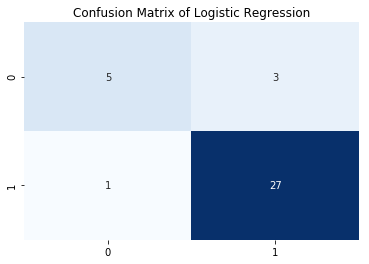

In [78]:
#Plotting Confusion Matrix for Logistic Regression.
cm=confusion_matrix(y_test,predlg)
sns.heatmap(cm,annot=True,cbar=False,cmap='Blues')

plt.title("Confusion Matrix of Logistic Regression")
plt.show()

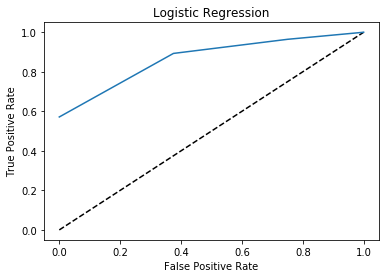

0.7946428571428572


In [79]:
#AUC_ROC Curve of Logistic Regression

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

auc_score=roc_auc_score(y_test,predlg)
print(auc_score)

In [80]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(lg,'Heart_Disease.pkl')

['Heart_Disease.pkl']